In [1]:
import pandas as pd

path = r'C:\Users\camere\Conda_3.11_enviroment\CSV DATA\brent tick data from 1jan2024.csv'
price = pd.read_csv(path, parse_dates=True, index_col=0)

In [2]:
from numba import njit
import numpy as np


bid_price_array = price['bidPrice'].to_numpy()
@njit
def CalculateLogReturns(price):
    returns_array = np.zeros(len(price))
    for i in range(1, len(price)):
        returns_array[i] = np.log(price[i] / price[i-1])
    return returns_array

bid_returns = CalculateLogReturns(bid_price_array)

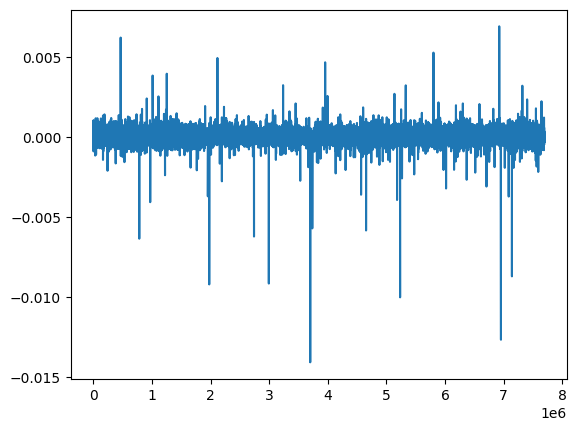

In [5]:
import matplotlib.pyplot as plt
plt.plot(bid_returns)
plt.show()

In [6]:
@njit
def CalculateRollingRealizedVolatility(returns):
    RV = np.zeros(len(returns))
    for i in range(window, len(returns)):
        RV[i] = np.sqrt(np.sum(returns[i-window:i]**2))
    return RV

window = 60
realized_volatility = CalculateRollingRealizedVolatility(bid_returns)

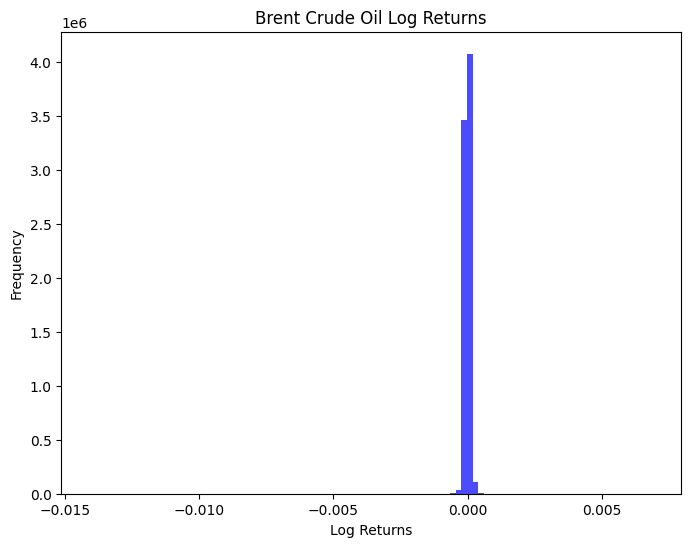

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(bid_returns, bins=100, color='blue', alpha=0.7)    
plt.title('Brent Crude Oil Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

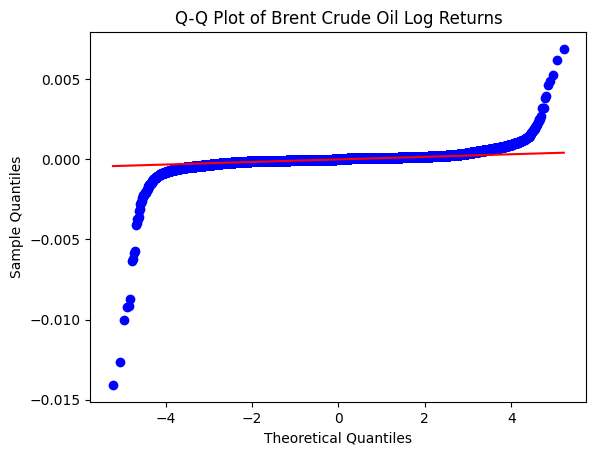

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming bid_returns is already defined
stats.probplot(bid_returns, dist="norm", plot=plt)
plt.title('Q-Q Plot of Brent Crude Oil Log Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()